In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib import rcParams
from pylab import *
import numpy as np
import os

In [2]:
hangul_station_Dict = {
    'Dobong_Sirubong' : '도봉구 시루봉로',
    'Dongdaemoon_Cheonhodaero' : '동대문구 천호대로',
    'Dongdaemoon_Hongreungro' : '동대문구 홍릉로',
    'Dongjak_Dongjakdaero' : '동작구 동작대로',
    'Enpyeong_JinHeungro' : '은평구 진흥로',
    'Gangdong_Cheonhodaero' : '강동구 천호대로',
    'Gangdong_Gucheonmeonro' :'강동구 구천면로',
    'Gangnam_Dosandaero' : '강남구 도산대로',
    'Gangnam_Hakdongro' : '강남구 학동대로',
    'Gangseo_Gangseoro' : '강서구 강서로',
    'Gangseo_Magokdong' : '강서구 마곡동',
    'Geumcheon_Doksandong' : '금천구 독산동',
    'Geumcheon_Geumharo' : '금천구 금하로',
    'Guro_Gamasanro' : '구로구 가마산로',
    'Gwanak_Sinrim' : '관악구 신림동길',
    'Gwangjin_Gwangnaruro' : '광진구 광나루로',
    'Jongno_Jongno' : '종로구 종로',
    'Jongro_Jonro35gagil' : '종로구 종로35가길',
    'Joong_Deoksugunggil' : '중구 덕수궁길',
    'Jungnang_Yongmasanro' : '중랑구 용마산로',
    'Jung_Cheonggaecheonro' : '중구 청계천로',
    'Mapo_Nogosandong' : '마포구 노고산동',
    'Mapo_Poeunro' : '마포구 포은로',
    'Nowon_Hwarang' : '노원구 화랑로',
    'Nowon_Sangyero' : '노원구 상계로',
    'Seocho_Gangnamdaero' : '서초구 강남대로',
    'Seocho_Sinbanporo' : '서초구 신반포로',
    'Seodaemoon_Segeomjeongro' : '서대문구 세검정로',
    'Seongbuk_Donamdong' : '성북구 돈암동',
    'Seongbuk_Samyangro' : '성북구 삼양로',
    'Seongdong_Ddukseomro' : '성동구 뚝섬로',
    'Seongdong_Ganbyeonbukro' : '성동구 강변북로',
    'Songpagu_Baekjegobunro' : '송파구 백제고분로',
    'Yangcheon_Chungang' : '양천구 중앙로',
    'Yeongdengpo_Dangsan' : '영등포구 당산로',
    'Yeongdeungpo_Yeongjungro' : '영등포구 영중로',
    'Yongsan_Hangandaero' : '용산구 한강대로',
    'Yongsan_Hannamdaero' : '용산구 한남대로'
}

In [3]:
plt.rc('font', family='Malgun Gothic')

In [4]:
plt.style.use(['ggplot'])

In [5]:
def read_csv_ym(station_name1, station_name2, year, month):
    if year != '2020':
        df1 = pd.read_csv(f'station_name_no_nan/{station_name1}/{year}/{station_name1}_{year}_{month}.csv')
        df2 = pd.read_csv(f'station_name_no_nan/{station_name2}/{year}/{station_name2}_{year}_{month}.csv')
    else:
        df1 = pd.read_csv(f'station_name_no_nan/{station_name1}/{year}/{station_name1}_2020_1.csv')
        df2 = pd.read_csv(f'station_name_no_nan/{station_name2}/{year}/{station_name2}_2020_1.csv')
    return df1, df2

In [6]:
def make_list(df, pm, date):
    resultArr = np.zeros((25,date))
    if pm == 10:
        # DataFrame.'특성명'.'데이터'.'행렬'.'transpose'
        pm10_Arr = df.pm10.values.reshape(date,24).T
        # 행렬 연산을 통해 위의 24x31행렬을 25x32행렬로 확장해줌
        resultArr[1:,:] = resultArr[1:,:] + pm10_Arr
        return resultArr.tolist()
    elif pm == 2.5:
        pm25_Arr = df.pm25.values.reshape(date,24).T
        resultArr[1:,:] = resultArr[1:,:] + pm25_Arr
        return resultArr.tolist()
    else:
        print('check your pm!!!')

In [7]:
def make_si_list(df, month, pm):
    month31 = ['1','3','5','7','8','10','12']
    month30 = ['4','6','9','11']
    month28 = ['2'] # 2016년 2월은 그냥 빼자...
    # 31일까지 있는 달
    if month in month31:
        return make_list(df, pm, 31)
    # 30일까지 있는 달
    elif month in month30:
        return make_list(df, pm, 30)
    # 28일까지 있는 달
    elif month in month28:
        return make_list(df, pm, 28)
    else:
        print("isn't your year 2016 ???")

In [8]:
# 결측치 0 을 지우는 함수
def del_nan(si_list1, si_list2):
    new_si_list1=[]
    new_si_list2=[]
    for i in range(len(si_list1)):
        if (si_list1[i] * si_list2[i]) != 0:
            new_si_list1.append(si_list1[i])
            new_si_list2.append(si_list2[i])
    return new_si_list1, new_si_list2

In [9]:
# 변수의 이름을 가져와서 label을 만들기 쉽게 한다.
def namestr(obj):
    return [name for name in globals() if globals()[name] is obj][0]

In [10]:
def plot_compare(station1, station2, time):
    st1, st2 = del_nan(station1[time], station2[time])
    plt.plot(st1, label=f'{namestr(station1)} : {time}시')
    plt.plot(st2, label=f'{namestr(station2)} : {time}시')

In [11]:
def plot_compare_rev1(station1, station2, time):
    plt.plot(station1, label=f'{namestr(station1)} : {time}시')
    plt.plot(station2, label=f'{namestr(station2)} : {time}시')

In [12]:
def biyul_cal(list1,list2):
    tlen = len(list1) # list의 크기 (nan 값을 제외한)
    sumA = sumB = 0
    for i in range(tlen):
        sumA += list1[i]
        sumB += list2[i]
    biyul = (sumA/sumB)*100
    biyul = round(biyul,2)
    return biyul

In [13]:
def biyul_plot(st1, st2, year, time):
    biyul_list=[]
    for month in range(1,13):
        month = str(month)
        df1, df2 = read_csv_ym(st1, st2, year, month) # df 읽어오기
        # 'time' 시각의 list 생성 (결측치도 삭제)
        hangangdaero, hannamdaero = del_nan(make_si_list(df1, month, 10)[time], make_si_list(df2, month, 10)[time])
        # 리스트에 평균 차이 저장
        biyul_list.append(biyul_cal(hangangdaero, hannamdaero))
    return biyul_list

In [14]:
def savefig_biyul(st1, st2, year,fig):
    if not os.path.exists(f'figures/{st1}_{st2}_compare'):
        os.makedirs(f'figures/{st1}_{st2}_compare')
    if not os.path.exists(f'figures/{st1}_{st2}_compare/biyul'):
        os.makedirs(f'figures/{st1}_{st2}_compare/biyul')
    fig.savefig(f'figures/{st1}_{st2}_compare/biyul/{year}_{st1}_{st2}_biyul.png')

In [15]:
def savefig_chai(st1, st2, year,fig):
    if not os.path.exists(f'figures/{st1}_{st2}_compare'):
        os.makedirs(f'figures/{st1}_{st2}_compare')
    if not os.path.exists(f'figures/{st1}_{st2}_compare/chai'):
        os.makedirs(f'figures/{st1}_{st2}_compare/chai')
    if not os.path.exists(f'figures/{st1}_{st2}_compare/chai/{year}'):
        os.makedirs(f'figures/{st1}_{st2}_compare/chai/{year}')
    if not os.path.exists(f'figures/{st1}_{st2}_compare'):
        os.makedirs(f'figures/{st1}_{st2}_compare')
    if not os.path.exists(f'figures/{st1}_{st2}_compare/chai'):
        os.makedirs(f'figures/{st1}_{st2}_compare/chai')
    if not os.path.exists(f'figures/{st1}_{st2}_compare/chai/{year}'):
        os.makedirs(f'figures/{st1}_{st2}_compare/chai/{year}')
    fig.savefig(f'figures/{st1}_{st2}_compare/chai/{year}/{st1}_{st2}_{year}_{time}_chai.png')

In [16]:
# 여기를 바꿔야
st1 = 'Yeongdeungpo_Yeongjungro'
st2 = 'Yangcheon_Chungang'

st1_hangul = hangul_station_Dict[st1]
st2_hangul = hangul_station_Dict[st2]

### 비율 그래프의 저장

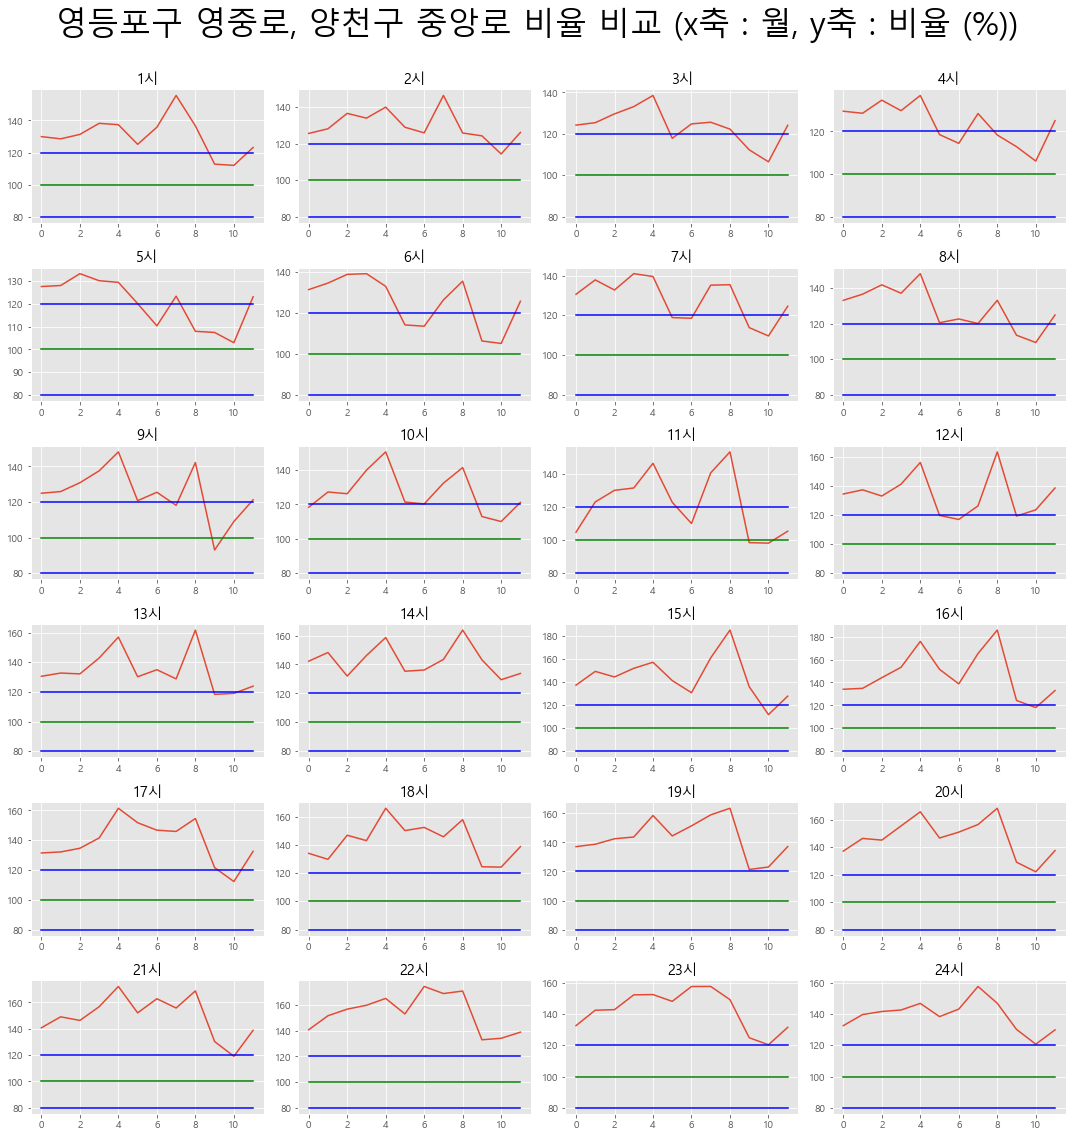

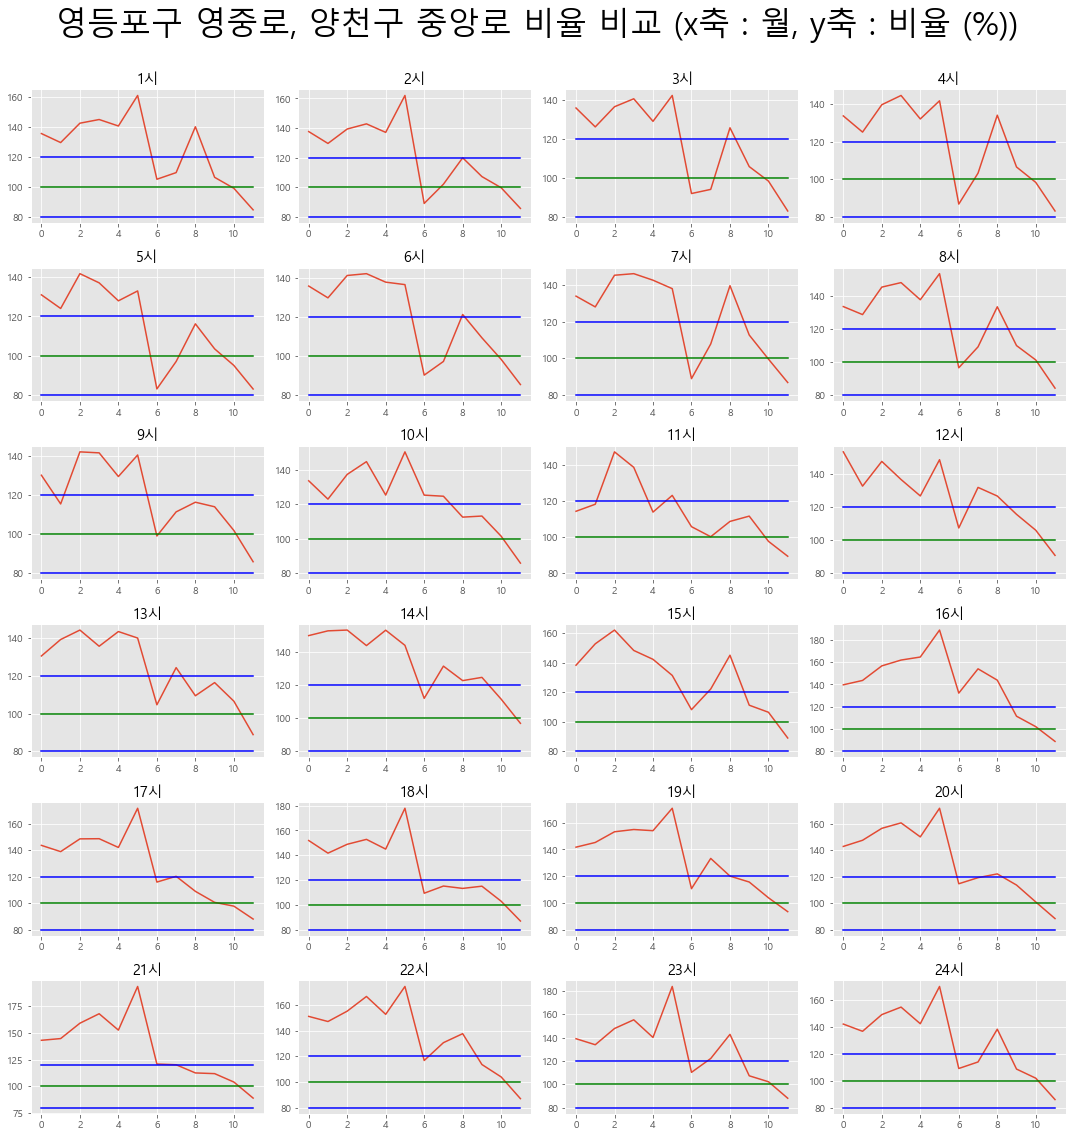

In [ ]:
for120 = [120 for i in range(12)]
for100 = [100 for i in range(12)]
for80 = [80 for i in range(12)]

yearList = ['2017','2018','2019'] 
for year in yearList:
    plt.figure(figsize=(15,15))
    for time in range(1,25):
        biyul_list=[]
        for month in range(1,13):
            month = str(month)
            df1, df2 = read_csv_ym(st1, st2, year, month) # df 읽어오기
            # 'time' 시각의 list 생성 (결측치도 삭제)
            st_list1, st_list2 = del_nan(make_si_list(df1, month, 10)[time], make_si_list(df2, month, 10)[time])
            biyul_list.append(biyul_cal(st_list1, st_list2))
        plt.subplot(6,4,int(time))
        plt.plot(biyul_list)

        plt.title(f'{time}시')

        plt.plot(for120,'b')
        plt.plot(for100,'g')
        plt.plot(for80,'b')
    
    
    plt.tight_layout()
    plt.suptitle(f"{st1_hangul}, {st2_hangul} 비율 비교 (x축 : 월, y축 : 비율 (%))", position=(0.5, 1.0+0.05), fontsize=32)
    fig = plt.gcf()
    plt.show()

    savefig_biyul(st1,st2,year,fig)

### 차이 그래프의 저장

In [ ]:
yearList = ['2017','2018','2019'] 
for year in yearList:
    for time in range(1,25):
        plt.figure(figsize=(15,9))
        for month in range(1,13):
            month = str(month)
            df1, df2 = read_csv_ym(st1, st2, year, month) # df 읽어오기
            # 'time' 시각의 list 생성 (결측치도 삭제)
            st_list1, st_list2 = del_nan(make_si_list(df1, month, 10)[time], make_si_list(df2, month, 10)[time])
            plt.subplot(4,3,int(month))
            plt.plot(st_list1)
            plt.plot(st_list2)
            plt.title(f'{month}월')
        
        plt.tight_layout()
        plt.suptitle(f"{st1_hangul}, {st2_hangul} 비율 비교 (x축 : 월, y축 : 비율 (%))", position=(0.5, 1.0+0.05), fontsize=32)
        fig = plt.gcf()
        plt.show()
        savefig_chai(st1, st2, year,fig)